In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats


# **This analysis explores Airbnb listings in NYC to identify pricing patterns, hotspots, and neighborhood differences.**

In [2]:
df = pd.read_pickle('cleaned_df')

# **which neighbourhood has highest listings?**

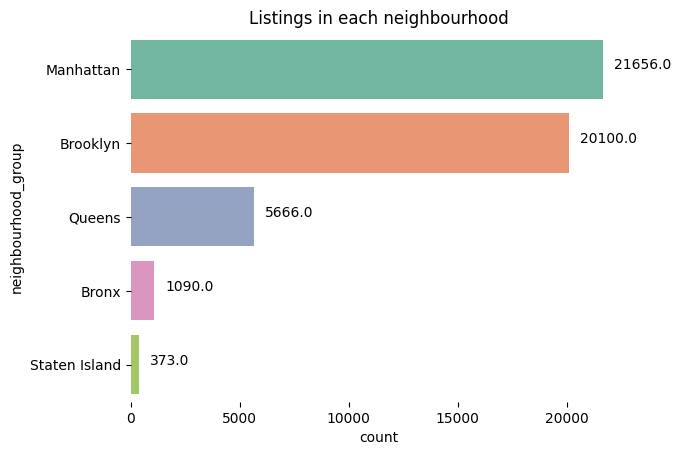

In [3]:
listing_per_neighbour = df['neighbourhood_group'].value_counts().reset_index()
listing_per_neighbour
plot = sns.barplot(data=listing_per_neighbour, x='count', y='neighbourhood_group', hue='neighbourhood_group', palette='Set2')

for patch in plot.patches:
    x_cord = patch.get_width()
    y_cord = patch.get_xy()[1]
    plt.text(x_cord+500, y_cord+0.4, x_cord)

for i in ['left','right','top','bottom']:
    plot.spines[i].set_visible(False)


plt.title('Listings in each neighbourhood')
plt.show()

**Manhattan has the most properties available for booking where as Staten Island has the least**

# How is the distibution of Prices among the listings?

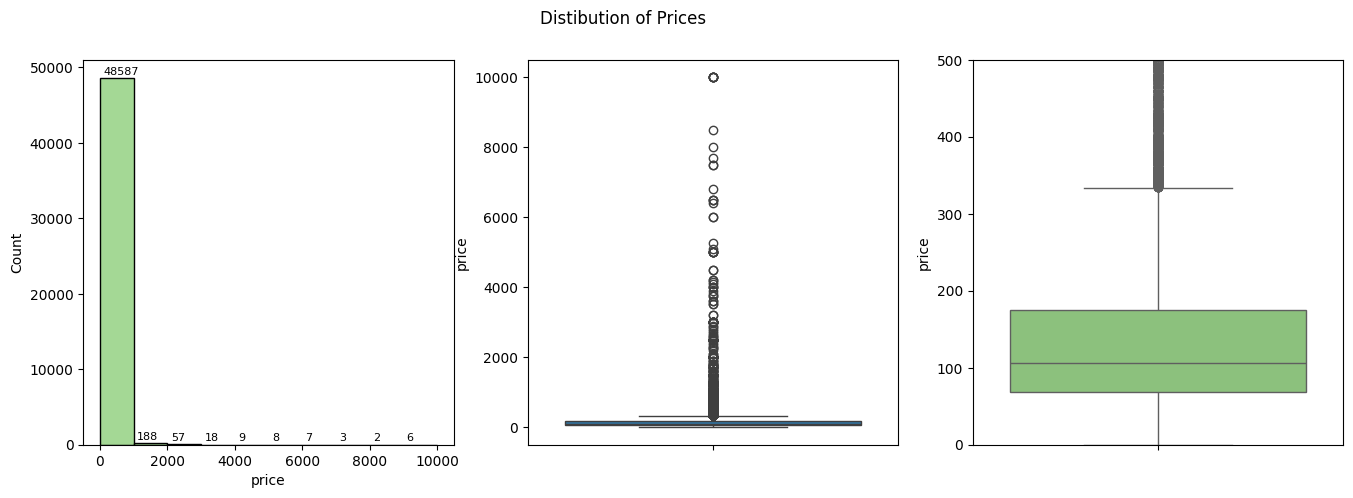

In [4]:
plt.figure(figsize=(18,5))
ax1 = plt.subplot(1,3,1)

sns.histplot(data=df, x='price', bins=10, color='#86cc72')
for patch in ax1.patches:
    plt.text(patch.xy[0]+100, patch.get_height()+500,patch.get_height(), fontsize=8)
ax2 = plt.subplot(1,3,2)
sns.boxplot(data=df, y='price')

ax3 = plt.subplot(1,3,3)
sns.boxplot(data=df, y='price', color='#86cc72')
plt.ylim(0,500)
plt.subplots_adjust(0.2)
plt.suptitle("Distibution of Prices", ha='center')
plt.show()





**99.4% of the listings are have prices under $1000, The median price is $106**

# Price distribution AND  which neighbourhood is Most expensive and Cheapest to rent a property

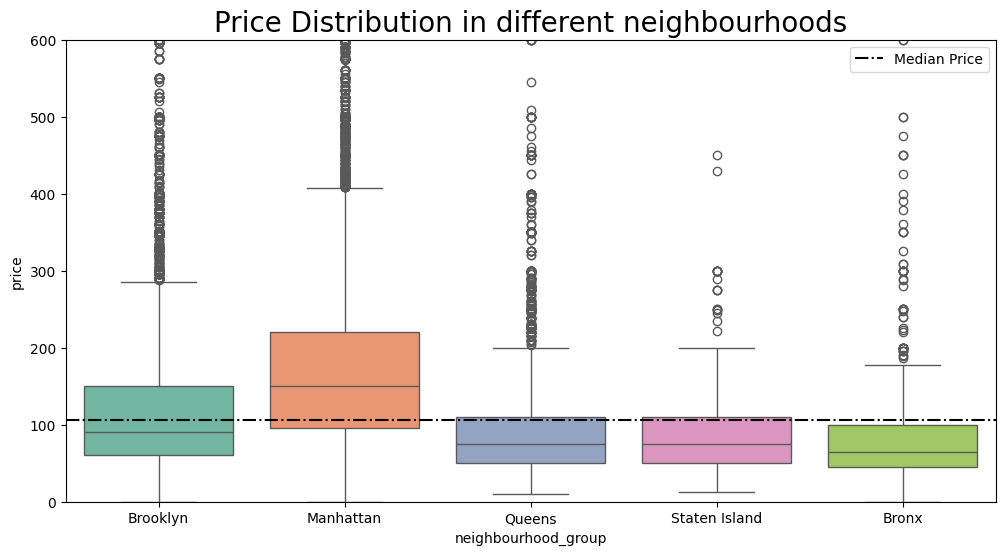

In [5]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='neighbourhood_group', y='price', hue='neighbourhood_group', palette="Set2")
plt.ylim(0,600)
plt.axhline(y=df['price'].median(), linestyle="-.", color='black', label="Median Price")
plt.legend()
plt.title("Price Distribution in different neighbourhoods", fontsize=20)
plt.show()

Manhattan is more expensive than other neighbourhoods 
And Bronx is the cheapest

# What are the top Neighbourhoods of each boroughs?

In [6]:
dfs = []
for i in df['neighbourhood_group'].unique():
    gr = df[df['neighbourhood_group'] ==i].groupby(['neighbourhood_group', 'neighbourhood'])['price'].mean().nlargest(2).reset_index()
    dfs.append(gr)

dfs
result_dfs = pd.concat(dfs, ignore_index=True)

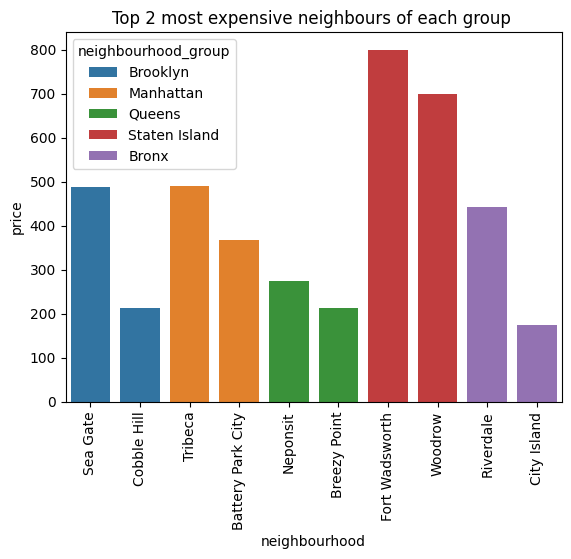

In [7]:
sns.barplot(data=result_dfs, x='neighbourhood',  y='price', hue='neighbourhood_group')
plt.xticks(rotation=90)
plt.title("Top 2 most expensive neighbours of each group ")
plt.show()

**Fort Wadsworth and Woodrow show the highest average prices; however, each neighborhood contains only one property, suggesting that these values are not representative of broader market trends.**

# How the other factors impact pricing ?

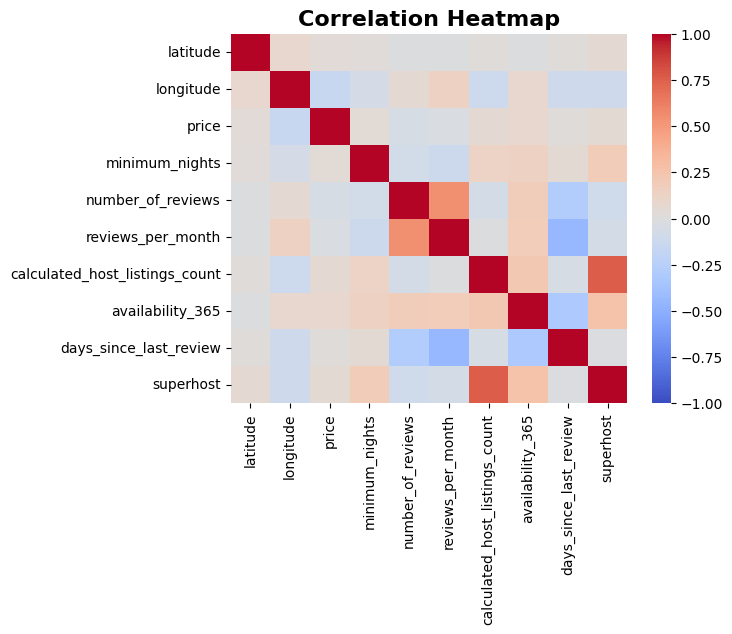

In [8]:
price_corr = df.drop(['host_id','id','has_reviews'], axis=1).corr(numeric_only=True)
sns.heatmap(data=price_corr, cmap='coolwarm', vmin=-1)
plt.title('Correlation Heatmap', fontsize=16, fontweight='bold')
plt.show()

**There is almost no meaningful linear correlation between Prices and other factors**

# **Do Airbnb listings that have at least one review differ in price compared to those with no reviews?**

# Null Hypothesis ($H_0$) : 
**The mean price of listings with at least one review is equal to the mean price of listings with no reviews**

# Alternative Hypothesis ($H_a$): 
**The mean price of listings with at least one review is different from the mean price of listings with no reviews**

In [9]:
with_reviews = df[df['number_of_reviews'] > 0]['price']
no_reviews = df[df['number_of_reviews'] == 0]['price']

stats.ttest_ind(with_reviews, no_reviews, equal_var=False)

TtestResult(statistic=np.float64(-13.626840468195988), pvalue=np.float64(5.81375966179996e-42), df=np.float64(11647.802160469535))

## Conclusion:
**(since p-value << 0.05) Rejecting the null hypothesis means there is statistically significant evidence to conclude that the mean prices do differ between the two groups.**

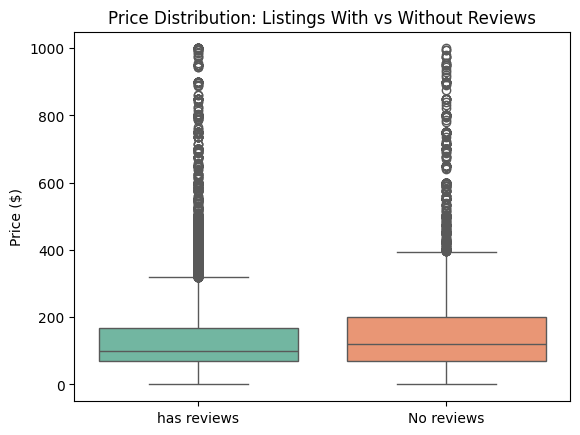

In [10]:

sns.boxplot(data=df[df['price'] < 1000], x='has_reviews', y='price',hue='has_reviews', palette='Set2')
plt.title('Price Distribution: Listings With vs Without Reviews')
plt.xlabel('')
plt.ylabel('Price ($)')
plt.show()

**Listings with reviews are statistically cheaper than listings without reviews.**

# Insight:



**Hosts may lower initial prices to attract early guests and build credibility through reviews.
This reflects a potential trust-building strategy in Airbnb’s marketplace dynamics.**


# ------------------------------------------------------------------------------------------------------

# **Are the listings of Superhosts priced more than non-superhosts?**

**Superhosts are the hosts who are above the 96th percentile of property listers.**

# Null Hypothesis ($H_0$) : 
**The mean price of listings of Superhosts is equal to the mean price of listings of non-superhosts**

# Alternative Hypothesis ($H_a$): 
**The mean price of listings of Superhosts is different from the mean price of listings of non-superhosts**

# t-test

In [11]:
superhosts_price = df[df['superhost']==True]['price']
no_superhosts_price = df[df['superhost']==False]['price']

stats.ttest_ind(superhosts_price, no_superhosts_price, equal_var=False)

TtestResult(statistic=np.float64(18.487499128323844), pvalue=np.float64(1.397570280717494e-71), df=np.float64(2472.1961121814484))

## Conclusion:
**(since p-value << 0.05) Rejecting the null hypothesis means there is statistically significant evidence to conclude that the mean prices do differ between the two groups.**

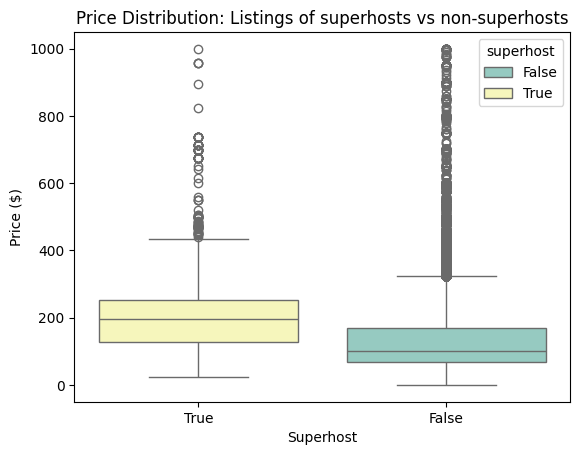

In [12]:

sns.boxplot(data=df[df['price'] < 1000], x='superhost', y='price', hue='superhost', palette='Set3', order=[True, False])
plt.title('Price Distribution: Listings of superhosts vs non-superhosts')
plt.xlabel('Superhost')
plt.ylabel('Price ($)')
plt.show()

**Superhosts tend to charge significantly higher prices than regular hosts.**


**This likely reflects the premium trust and quality perception that comes with Superhost status — guests are willing to pay more for reliability, cleanliness, and experience.**

**From a platform perspective, this validates Airbnb’s incentive model: achieving Superhost status leads to tangible financial benefit.**

# **Does type of room impact Pricing?**

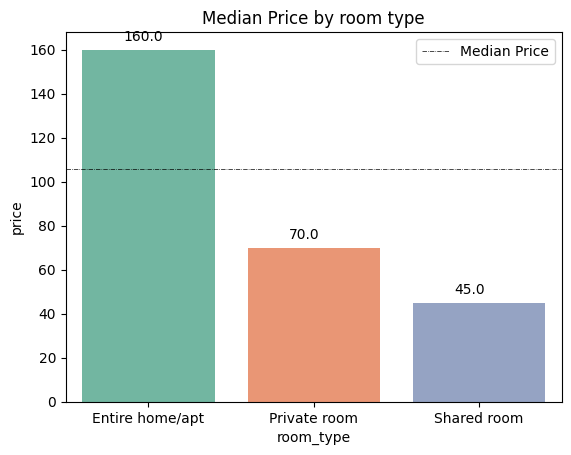

In [13]:
median_by_room_type = df.groupby('room_type')['price'].median().reset_index()
plot = sns.barplot(data=median_by_room_type, x='room_type', y='price', hue='room_type', palette='Set2')
for patch in plot.patches:
    x = patch.xy[0]
    height = patch.get_height()
    color = patch.get_facecolor()
    plt.text(x+0.25, height+3.89, round(height,2))
plt.axhline(df['price'].median(), linestyle="-.", label="Median Price", color='black', linewidth=0.5)
plt.title('Median Price by room type')
plt.legend()
plt.show()

Renting an entire home costs around $160, whereas Private rooms costs $70 and Shared room $45

**Renting Entire home pushes the prices of the listing higher, whereas sharing rooms are the cheapest way to rent a listing**

# Which type of rooms is cheapest in which Neighbourhood?

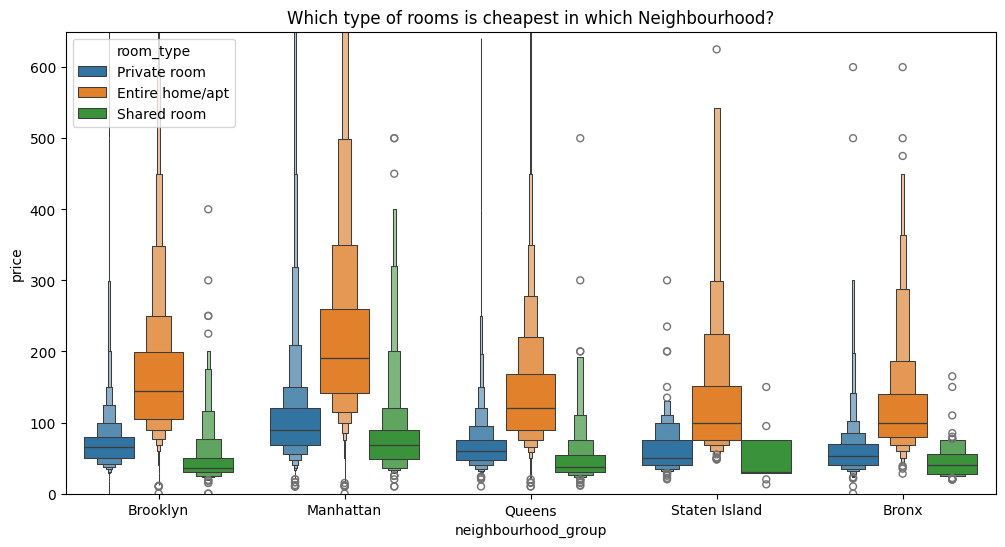

In [14]:
plt.figure(figsize=(12,6))
sns.boxenplot(data=df, x='neighbourhood_group', y='price', hue='room_type')
plt.ylim(0,650)
plt.title('Which type of rooms is cheapest in which Neighbourhood?')
plt.show()

# is there any correlation between pricing and availability of rooms?

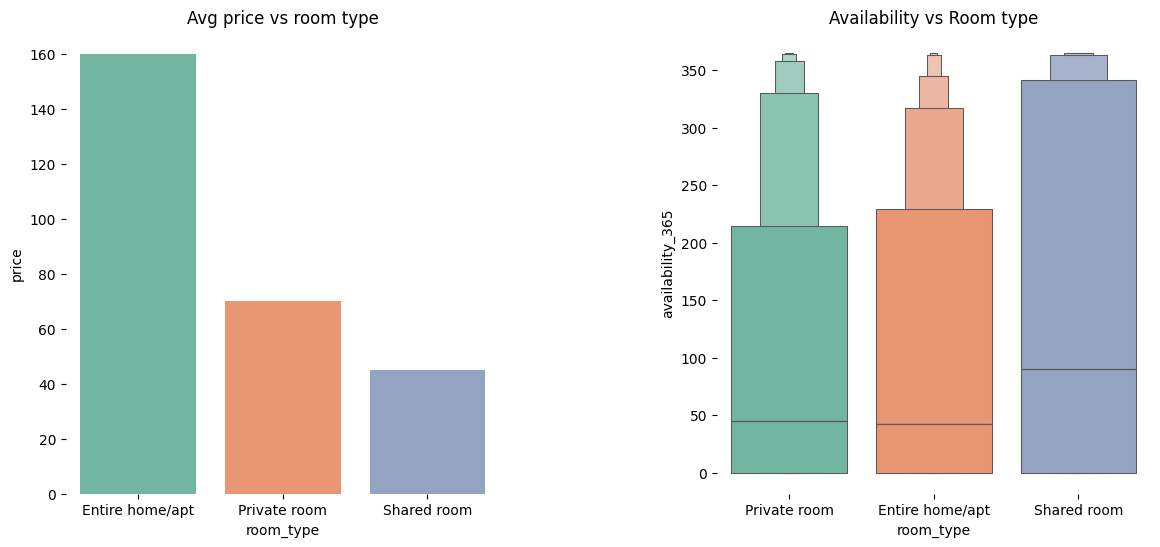

In [21]:
plt.figure(figsize=(14,6))
ax=plt.subplot(1,2,1)
sns.barplot(data=median_by_room_type, x='room_type', y='price', hue='room_type', palette='Set2')
plt.title("Avg price vs room type")
for i in ['left','right', 'top','bottom']:
    ax.spines[i].set_visible(False)

ax1=plt.subplot(1,2,2)
sns.boxenplot(data=df, x='room_type',y='availability_365',hue='room_type',  palette='Set2')
plt.title("Availability vs Room type")
for i in ['left','right', 'top','bottom']:
    ax1.spines[i].set_visible(False)

plt.subplots_adjust(wspace=0.5)

**Shared Rooms have lowest avg prices and highest availability**

<Axes: xlabel='availability_365', ylabel='Count'>

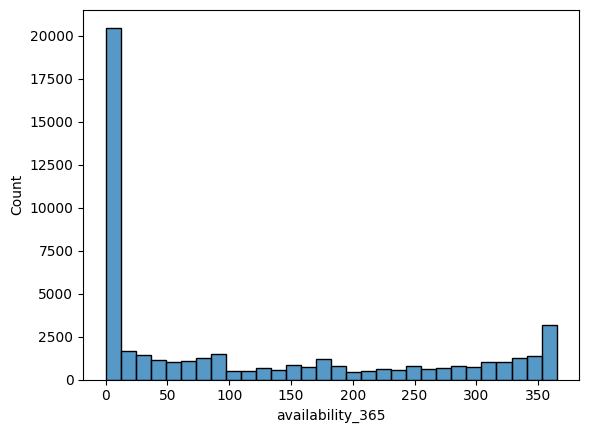

In [16]:
sns.histplot(data=df, x='availability_365')